In [2]:
from konlpy.tag import Okt
from konlpy.tag import Komoran
from konlpy.tag import Kkma

import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from keras.preprocessing.text import text_to_word_sequence

from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords

import kss

from konlpy.tag import Mecab

import re
import pandas as pd
import numpy as np

In [9]:
# konlpy ----------------------
from konlpy.tag import Kkma
from konlpy.tag import Komoran

# default ---------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pycaret.regression import *

import re 

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# wordcloud -------------------
from wordcloud import WordCloud
from collections import Counter

# KoNLPy 패키지 테스트

한나눔, OKT, Komoran, Kkoma
senctence... 이 부분 가져오기

In [ ]:
# ! pip install kss

## Okt

In [192]:
from konlpy.tag import Okt
okt = Okt()

print(okt.nouns("게시글이 좋았다면 공감을 눌러주세요!!"))

print(okt.morphs('아버지가 방에 들어가신다'))

print(okt.pos('아버지가 방에 들어가신다'))
print(okt.pos('아버지가방에들어가신다'))

['게시', '글', '공감']
['아버지', '가', '방', '에', '들어가신다']
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


## Komoran

In [ ]:
# from konlpy.tag import Komoran
# komoran = Komoran()
# print(komoran.nouns("게시글이 좋았다면 공감을 눌러주세요!!"))

['게시', '글', '공감']


In [195]:
from konlpy.tag import Komoran
komoran = Komoran()

print(komoran.nouns("게시글이 좋았다면 공감을 눌러주세요!!"))

print(komoran.morphs('아버지가 방에 들어가신다'))

print(komoran.pos('아버지가 방에 들어가신다'))
print(komoran.pos('아버지가방에들어가신다'))

['게시', '글', '공감']
['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]
[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]


## Kkoma

In [196]:
from konlpy.tag import Kkma
kkma = Kkma()

print(kkma.nouns("게시글이 좋았다면 공감을 눌러주세요!!"))

print(kkma.morphs('아버지가 방에 들어가신다'))

print(kkma.pos('아버지가 방에 들어가신다'))
print(kkma.pos('아버지가방에들어가신다'))

['게시', '게시글', '글', '공감', '주세']
['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]


* split 보다 낫다.

* 왜 패키지가 굳이 여러개 있을까?  
품사 관리체계가 서로 다르다.  
품사 Padding 자체도 서로 다르다.(서로 다르게 자름) : 레마제이션(표제어 추출 VV + 'EFN' 등등 : 표준어처럼 만듦)할 때도 있고, 워드클라우드 할 때는 그냥 verb로 꺼내는 게 편하기도 하고  


[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]  
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]  

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]  
[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]  

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]  
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]  

## 영어문장 테스트

In [198]:
# KoNLP는 한국어 사전이라 영어 문장 하면 내용 안 나옴 -> 불용언 처리
nlp_list = [okt, komoran, kkma]

for nlp in nlp_list:
    print(nlp.nouns("Mariupol city council accused Russia of dropping several bombs on the hospital from the air, destroying the medical facility building where children were recently being treated."))
    print(nlp.nouns("This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed."))


[]
[]
[]
[]
[]
[]


### 신조어 테스트

In [199]:
# 사전에 없는 건 인식 못 하기도.
# 중간에 . 있으면 문장 끊어서 못 알아듣기도. -> 토픽모델에서 제대로 인식 못하기도 한다.

nlp_list = [okt, komoran, kkma]

for nlp in nlp_list:
    print(nlp.nouns("게시글이 apple 좋았다면. 쿄쿄쿄 Dr.Hong에게 공감을 눌러주세요!!"))

['게시', '글', '쿄쿄', '쿄', '공감']
['게시', '글', '공감']
['게시', '게시글', '글', '쿄쿄쿄', '공감', '주세']


# 전처리

## 단어 토큰화(word tokenization)

In [191]:
import nltk

In [200]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from keras.preprocessing.text import text_to_word_sequence

In [201]:
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [202]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [203]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [204]:
# keras는 글자에 대해서만 띄어쓰기를 기준으로 나누기 때문에 한국어도 먹는다.
print('단어 토큰화3 :',text_to_word_sequence("나는 밥을 먹는다."))

단어 토큰화3 : ['나는', '밥을', '먹는다']


## 문장 토큰화

* 구두점(.)으로 자른다.

In [73]:
from nltk.tokenize import sent_tokenize

text = "Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year"
print('문장 토큰화1 :',sent_tokenize(text))


문장 토큰화1 : ["Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.", 'and my name is hl']


# 한국어 전용 띄어쓰기

In [ ]:
# pycospacing이라는 패키지가 띄어쓰기 잘 해주긴 한데 그거 깔면 케라스랑 넘피랑 버전 다 낮아진다.

In [206]:
import kss

In [ ]:
# text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
# print('한국어 문장 토큰화 :',kss.split_sentences(text))
# # 원래 띄어쓰기 교정해주는데 이제 안 하네..

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


# mecab(은전한닢) ////메캅!!!!!!!!!!!
아 처음에 nltk 쓰다가... konlpy로 바꿨는데... 그것도 별로라 mecab 썼음다... 코랩은 데이터 적어서 그냥 버쳐 환경으로 구성해서... 해봤음다..
불용어: \\dataset\\ko_stopword_dict.txt

In [207]:
from konlpy.tag import Mecab # Mecab이 안으로 들어갔다.(블로그 찾을 때 주의)
mecab = Mecab(r"C:\\mecab\\mecab-ko-dic") # 쓰기 싫으면 환경변수로 잡아두면 된다.
res = mecab.pos('아버지가방에들어가신다')
print(res) # 띄어쓰기 안 해도 확률적으로 계산해서 조사 잘 뜯어준다.

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


## 어간, 표제어 추출

<pre>
**Stemming**

am → am

the going → the go

having → hav

**Lemmatization**

am → be

the going → the going

having → have

## 한국어

<pre>
어간(stem) : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

어미(ending): 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

# Lematization 겁나 중요!!! -> 필기 옮겨오기

## 어간 추출(Stemming) , 표제어 추출(Lemmatization)
* Lemmatization : 품사 태깅과 같이 써야 정확하다<br>

<pre>
* Stemming
    am → am
    the going → the go
    having → hav
* Lemmatization
    am → be
    the going → the going
    having → have

* 어간(stem) 
    용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 
    때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

* 어미(ending)
    용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ['policy', 'doing', 'am', 'done', 'having', 'going']
print(words)
print([lemmatizer.lemmatize(w, 'v') for w in words])

['policy', 'doing', 'am', 'done', 'having', 'going']
['policy', 'do', 'be', 'do', 'have', 'go']


# 불용어(stopword)
전체 문장을 해석하는 데 의미가 없는 단어 제거, 너무 많거나.  
(단, 처리하기 전에 미리 동사 가지고 lematization 해야 한다. 한국어든 영어든 불용어 사전 주는데 한국어는 불용어 겁나 많다.)  
https://velog.io/@csy9604/NLP-%EC%96%B8%EC%A0%9C%EA%B9%8C%EC%A7%80-%EB%AF%B8%EB%A3%B0%EB%9E%98-%EC%9D%BC%EB%8B%A8-%EB%93%A4%EC%96%B4%EC%99%80-2.-NLP-%EC%A0%84%EC%B2%98%EB%A6%AC-%EC%A0%95%EB%A6%AC
  

In [208]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

stop_words_list = stopwords.words('english') # korean 안 됨
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])


불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LHL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [212]:
from keras.preprocessing.text import text_to_word_sequence

ker = text_to_word_sequence('아버지가방에들어가신다')

stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [213]:
from konlpy.tag import Okt

In [214]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는" # 눈으로 보고 노가다...

stop_words = set(stop_words.split(' ')) # 처음부터 리스트로 만들면 된다.
word_tokens = okt.morphs(example) # 품사 태깅으로 잡는다.

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

# 결국 워드클라우드로 명사만 갖고 오는 게 .... 다다... -> 금융에서 보통 제목으로 하고 내용 넣는 순간 배가 산으로 간다...(만약 둘 다 하면 제목에 weight 9, 내용물에 1 주는 게 제일 나았다.) (특히 기사의 경우. 커뮤니티는 ㄴㄴ.. 커뮤니티는 내용 중요)
# 커뮤니ㅋ티 웬만하면 하지 마라 전처 하다가 세상 끝난다.

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


In [215]:
import re
from konlpy.tag import  Mecab # Mecab이 안으로 들어갔다.(블로그 찾을 때 주의)
import pandas as pd
import numpy as np

# from konlpy.tag import Okt
# tokenizer = Okt()



def my_stopword(text,tokenizer):
    
    # stopwords = ['이번', '에', '을', '를', '이', '가', '은', '는']
    
    # 기본
    stopwords = pd.read_csv('dataset/ko_stopword_dict.txt', sep = '\n') # headder = None
    stopwords = stopwords['stopwords'].values.tolist() 
    
    # 커스텀
    stopwords2 = ['게', '힌', '은']
    stopwords += stopwords2
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    # token = tokenizer.morphs(txt)
    morphs = mecab.morphs(txt)
    token = [t for t in morphs if t not in stopwords]
        
    return token

In [216]:
ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
res= my_stopword(ex_text,mecab)
print("품사태깅:", res)

print("단어토큰화: ", mecab.nouns(ex_text)) # 오히려 시황 이런 거는 명사로 태깅하는 게 제일 예쁘게 나왔다.

품사태깅: ['새롭', '개봉', '한', '영화', '배우', '훌륭', '한', '연기력', '아름다운', '목소리', '갖', '고', '있']
단어토큰화:  ['이번', '개봉', '영화', '배우', '연기력', '목소리']


In [217]:
text_list = ['이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!',
             '이번 속편에는 웃음 포인트가 더 많다. 탐정이라는 제목에 걸맞은 탐정사무소를 개설하고, 본격적인 탐정극을 펼친다.',
             '어제의 최상현은 정말 잘생겼다고 생각하지 않는다.']

for text in text_list:
    res= my_stopword(text,mecab)
    print("품사태깅:", res)

    print("단어토큰화: ", mecab.nouns(text)) # 오히려 시황 이런 거는 명사로 태깅하는 게 제일 예쁘게 나왔다.

품사태깅: ['새롭', '개봉', '한', '영화', '배우', '훌륭', '한', '연기력', '아름다운', '목소리', '갖', '고', '있']
단어토큰화:  ['이번', '개봉', '영화', '배우', '연기력', '목소리']
품사태깅: ['속편', '는', '웃음', '포인트', '더', '많', '다', '탐정', '라는', '제목', '걸맞', '탐정', '사무소', '개설', '고', '본격', '적', '인', '탐정극', '펼친다']
단어토큰화:  ['이번', '속편', '웃음', '포인트', '탐정', '제목', '탐정', '사무소', '개설', '본격', '탐정극']
품사태깅: ['어제', '최상현', '정말', '잘', '생겼', '다고', '생각', '지', '않', '는다']
단어토큰화:  ['어제', '최상현', '생각']


In [218]:
import kss
text_list = ['이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!',
             '이번 속편에는 웃음 포인트가 더 많다. 탐정이라는 제목에 걸맞은 탐정사무소를 개설하고, 본격적인 탐정극을 펼친다.',
             "개인적으로 그 작품에 대한 애착이 강하다. 시나리오를 읽을 때부터 감정이 많이 이입됐다. 촬영하면서는 감독님을 좋아하게 됐고, 배우들과도 끈끈해졌다. 다들 이 영화를 걱정하고 좋아하는게 눈에 보이더라. 개봉에 대한 우려가 있기는 하지만, 가장 좋은 시기에, '기적' 같은 만남을 할 수 있게 되지 않을까. 진심어린 따뜻함을 전해 드릴 수 있을 것 같다. 열심히 기다리고 있다."]

for text in text_list:
    res= kss.split_sentences(text)
    print('=='*30)
    print('한국어 문장 토큰화 :',res)
    print('=='*30)
    
    for text in res:
        res= my_stopword(text,mecab)
        print('\n')
        print(text)
        print("품사태깅:", res)
        print("단어토큰화: ", mecab.nouns(text))
        print('\n')

# 문장으로 다시 만들려면 품사태깅 한 다음에 제대로 된 문장 학습시켜서 넣고 돌려야 한다.

한국어 문장 토큰화 : ['이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!']


이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!
품사태깅: ['새롭', '개봉', '한', '영화', '배우', '훌륭', '한', '연기력', '아름다운', '목소리', '갖', '고', '있']
단어토큰화:  ['이번', '개봉', '영화', '배우', '연기력', '목소리']


한국어 문장 토큰화 : ['이번 속편에는 웃음 포인트가 더 많다.', '탐정이라는 제목에 걸맞은 탐정사무소를 개설하고, 본격적인 탐정극을 펼친다.']


이번 속편에는 웃음 포인트가 더 많다.
품사태깅: ['속편', '는', '웃음', '포인트', '더', '많', '다']
단어토큰화:  ['이번', '속편', '웃음', '포인트']




탐정이라는 제목에 걸맞은 탐정사무소를 개설하고, 본격적인 탐정극을 펼친다.
품사태깅: ['탐정', '라는', '제목', '걸맞', '탐정', '사무소', '개설', '고', '본격', '적', '인', '탐정극', '펼친다']
단어토큰화:  ['탐정', '제목', '탐정', '사무소', '개설', '본격', '탐정극']


한국어 문장 토큰화 : ['개인적으로 그 작품에 대한 애착이 강하다.', '시나리오를 읽을 때부터 감정이 많이 이입됐다.', '촬영하면서는 감독님을 좋아하게 됐고, 배우들과도 끈끈해졌다.', '다들 이 영화를 걱정하고 좋아하는게 눈에 보이더라.', "개봉에 대한 우려가 있기는 하지만, 가장 좋은 시기에, '기적' 같은 만남을 할 수 있게 되지 않을까.", '진심어린 따뜻함을 전해 드릴 수 있을 것 같다.', '열심히 기다리고 있다.']


개인적으로 그 작품에 대한 애착이 강하다.
품사태깅: ['개인', '적', '작품', '대한', '애착', '강하', '다']
단어토큰화:  ['개인', '작품', '애착']




시나리오를 읽을 때부터 감정이 많이 이입

# [실습] 식수 --> 중식메뉴 (옵션: + 워드클라우드)

In [219]:
# konlpy ----------------------
from konlpy.tag import Kkma
from konlpy.tag import Komoran

# default ---------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pycaret.regression import *

import re 

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# wordcloud -------------------
from wordcloud import WordCloud
from collections import Counter

## data 준비

In [3]:
menu = pd.read_csv('./dataset/cafeteria.csv')

In [221]:
menu['중식메뉴'][:5]

0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) 
1         쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) 
2     카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침  견과류조림  요구르트  포기김치 (배추,고추가루:국내산) 
3             쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치 (배추,고추가루:국내산) 
4    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채  청경채무침  요구르트  포기김치 (배추,고추가루:국내산) 
Name: 중식메뉴, dtype: object

In [222]:
menu['중식메뉴'].values.tolist()[:5]

['쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) ',
 '쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) ',
 '카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침  견과류조림  요구르트  포기김치 (배추,고추가루:국내산) ',
 '쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치 (배추,고추가루:국내산) ',
 '쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채  청경채무침  요구르트  포기김치 (배추,고추가루:국내산) ']

### lambda 이용해서 메뉴 분리

In [223]:
p = re.compile(f'([가-힣]+) ')
lunch_series = menu['중식메뉴'].apply(lambda x : p.findall(x))
cloud_list = []
for lunch_list in lunch_series:
    for lunch in lunch_list:
        cloud_list.append(lunch)
        # print(lunch)
        # lunch = Komoran.nouns(lunch)
        # print(lunch)

In [224]:
cloud_list[:10]

['잡곡밥',
 '오징어찌개',
 '쇠불고기',
 '계란찜',
 '청포묵무침',
 '요구르트',
 '포기김치',
 '잡곡밥',
 '김치찌개',
 '가자미튀김']

In [225]:
komoran = Komoran()

for row in menu['중식메뉴'].values.tolist():
    row = komoran.nouns(row)
    # print(row)

## lambda // wordcloud: generate

In [230]:
p = re.compile(f'([가-힣]+) ')
lunch_series = menu['중식메뉴'].apply(lambda x : p.findall(x))
cloud_list = []
for lunch_list in lunch_series:
    for lunch in lunch_list:
        cloud_list.append(lunch)
        # print(lunch)
        # lunch = Komoran.nouns(lunch)
        # print(lunch)

(-0.5, 399.5, 199.5, -0.5)

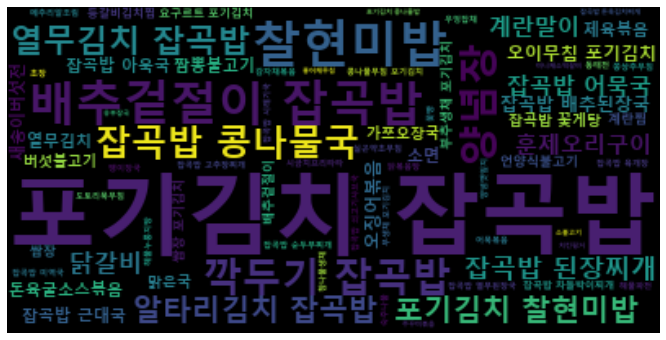

In [233]:
f, axes = plt.subplots(figsize=(20,6))

text = " ".join(cloud_list)
wordcloud = WordCloud(max_font_size=100, font_path='C:\Windows\Fonts\malgunbd').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

-> 중복값이 나오는 문제 있음

## lambda // wordcloud : generate_from_frequencies

(-0.5, 399.5, 199.5, -0.5)

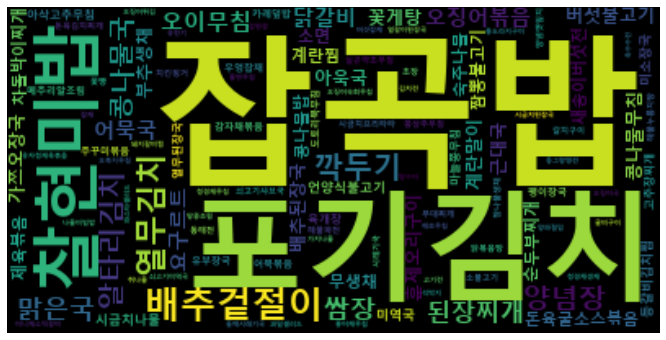

In [234]:
f, axes = plt.subplots(figsize=(20,6))

cloud_dict = Counter(cloud_list)
wordcloud = WordCloud(max_font_size=100, font_path='C:\Windows\Fonts\malgunbd').generate_from_frequencies(cloud_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Lambda + nouns -> 형태 안 맞아서 에러

In [238]:
# p = re.compile(f'([가-힣]+) ')
# lunch_series = menu['중식메뉴'].apply(lambda x : p.findall(x))
# cloud_list = []
# for lunch_list in lunch_series:
#     for lunch in lunch_list:
#         lunch = Komoran.nouns(lunch)
#         cloud_list.append(lunch)

TypeError: nouns() missing 1 required positional argument: 'phrase'

In [239]:
cloud_list[:10] # shape 때문에 에러

[]

In [ ]:
# p, axes = plt.subplots(figsize=(20,6))

# text = ' '.join(cloud_list)
# wordcloud = WordCloud(max_font_size=100, font_path='C:\Windows\Fonts\malgunbd').generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')

## noun으로 토큰화

In [258]:
lunch_series = menu['중식메뉴']
cloud_list = []

okt = Okt()

for lunch_list in lunch_series:
    lunch = okt.nouns(lunch_list) # lunch는 list꼴로 출력
    cloud_list.extend(lunch) # append 대신 extend 사용

(-0.5, 399.5, 199.5, -0.5)

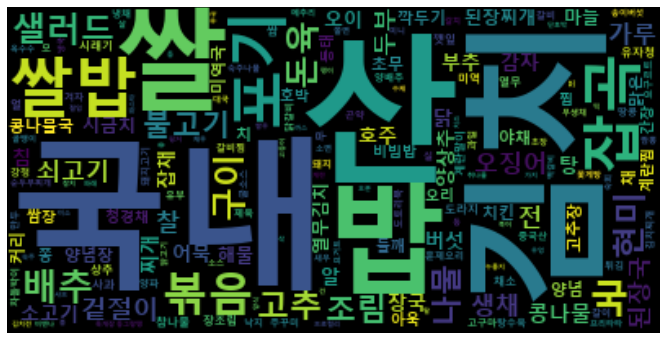

In [259]:
f, axes = plt.subplots(figsize=(20,6))

cloud_dict = Counter(cloud_list)
wordcloud = WordCloud(max_font_size=100, font_path='C:\Windows\Fonts\malgunbd').generate_from_frequencies(cloud_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

* 데이터 클리닝이 제대로 안 됐다.

## lambda로 간단 정제 후 noun으로 토큰화

In [5]:
p = re.compile(f'([가-힣]+) ')
lunch_series = menu['중식메뉴'].apply(lambda x : p.findall(x))
lunch_series = menu['중식메뉴'].apply(lambda x : ' '.join(x)) # list를 텍스트로 바꿈
cloud_list = []

okt = Okt()

for lunch_list in lunch_series:
    lunch = okt.nouns(lunch_list)
    cloud_list.append(lunch)

TypeError: unhashable type: 'list'

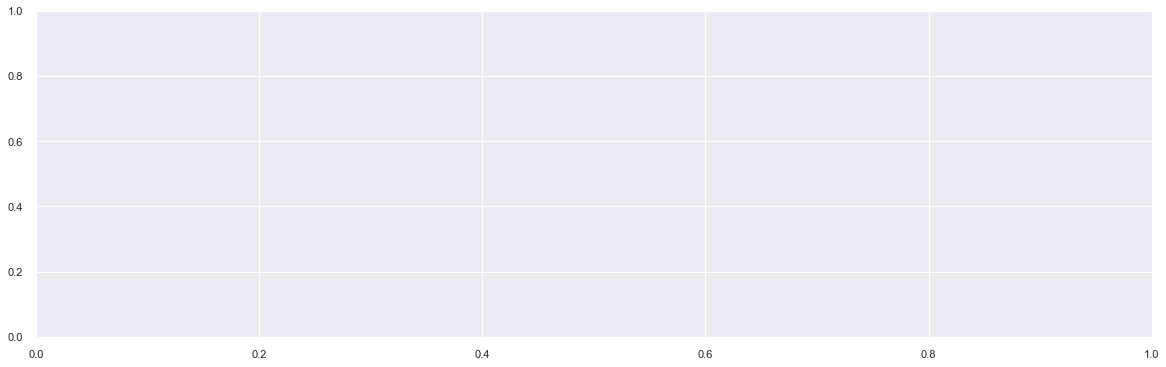

In [10]:
f, axes = plt.subplots(figsize=(20,6))

cloud_dict = Counter(cloud_list)
wordcloud = WordCloud(max_font_size=100, font_path='C:\Windows\Fonts\malgunbd').generate_from_frequencies(cloud_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## sklearn..CountVectorizer()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords 

In [21]:
df = pd.read_csv("./dataset/ko_stopword_dict.txt") #------ 기본 header=None
list1 = df['stop'].values.tolist()
cnt_vt = CountVectorizer(stop_words=list1)    
    
text_list = ["내가 좋아하는 사과는 빨간 사과이다. 사과라서 좋다.",
             "바나나는 노랗다."]
print(text_list)

res = cnt_vt.fit_transform(text_list)  #Iterable
print(res)  # COO vs. CSR
print(res.toarray())

print(cnt_vt.vocabulary_)    
vocab_sorted = sorted(cnt_vt.vocabulary_.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

['내가 좋아하는 사과는 빨간 사과이다. 사과라서 좋다.', '바나나는 노랗다.']
  (0, 0)	1
  (0, 8)	1
  (0, 4)	1
  (0, 3)	1
  (0, 6)	1
  (0, 5)	1
  (0, 7)	1
  (1, 2)	1
  (1, 1)	1
[[1 0 0 1 1 1 1 1 1]
 [0 1 1 0 0 0 0 0 0]]
{'내가': 0, '좋아하는': 8, '사과는': 4, '빨간': 3, '사과이다': 6, '사과라서': 5, '좋다': 7, '바나나는': 2, '노랗다': 1}
[('좋아하는', 8), ('좋다', 7), ('사과이다', 6), ('사과라서', 5), ('사과는', 4), ('빨간', 3), ('바나나는', 2), ('노랗다', 1), ('내가', 0)]


# Vectorize

## BoW(Bag Of Word)
* 문서를 벡터로 변환하는 가장 기본적인 방법으로, 문서 내의 모든 단어를 모아 가방(Bag of words)를 만들고, <br>
  특정 문서에 어떤 단어가 들어있는지를 리스트 형태의 숫자로 나타내는 것
---------------------------------------
<pre>
sentence1 = 'This is a black cat'
sentence2 = 'This is a white dog'

BoW = ['this', 'is', 'a', 'black', 'cat', 'white', 'dog']
dictionary = {'a': 2, 'black': 3, 'cat': 4, 'dog': 6, 'is': 1, 'this': 0, 'white': 5} # 딕트 내에 ABC 순 정렬, order 설정하면 다르게 다온다.

<font color=red size=3><b>Tokenize vs. Vectorize</b></font>
# Tokenize : 자르기
sentence1 = ['This', 'is', 'a', 'black', 'cat']
sentence2 = ['This', 'is', 'a', 'white', 'dog']

# vectorize : 사전존재시 1
# dictionary: ['this', 'is', 'a', 'black', 'cat', 'white', 'dog']
sentence1 = [1, 1, 1, 1, 1, 0, 0]
sentence2 = [1, 1, 1, 0, 0, 1, 1]
</pre>

-----

## sklearn..CountVectorizer()
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
*  문서 집합(문서 리스트)에서 단어 토큰을 생성하고 각 단어를 세어 BOW 기반으로 벡터 생성
<pre>
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# sklearn API이기 때문에 fit_transform
# 문장 준비
# iterable한 형태로 줘야 함.

cv = CountVectorizer(ngram_range=(1, 2), # 한 개 ~ 두 개로 묶어줘(한 개로 묶은 거 두 개로 묶은 거 나옴)
                     # ngram_range=(1, 1), # 한 단어씩 끊는다.
                     # stop_words=None,
                     token_pattern='(?u)\\b\\w\\w+\\b' # 각 토큰은 두 글자 이상으로 이루어져 있다.
                    )

corpus = ['This is a black cat',
          'This is a white dog']

cv.fit(corpus) # wordbag화 해서 숫자 매겨진 상태로 메모리에 올라감.
cv.vocabulary_ # 메모리에 있는 거 미리 확인 -> transform하면 어떻게 바뀔지를 미리 본다.

{'this': 7,
 'is': 4,
 'black': 0,
 'cat': 2,
 'this is': 8,
 'is black': 5,
 'black cat': 1,
 'white': 9,
 'dog': 3,
 'is white': 6,
 'white dog': 10}

## sklearn..TfidfVectorizer()☝
* (TF-IDF, Term Frequency-Inverse Document Frequency) : 우선 DTM을 만든 후, TF-IDF 가중치를 부여한 BOW 벡터 생성
* 많은 문서에 등장하는 단어는 비중이 작아지고, 특정 문서군에서만 등장하는 단어는 비중이 높아진다.
* ref [수식]: https://tlab.it/en/allegati/help_en_online/gtfidf.htm
<pre>
TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None,
                lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None,
                token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None,
                vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, # l2 정규화를 쓴다
                smooth_idf=True, sublinear_tf=False)[source]

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer # 자주 쓴다.
from pprint import pprint

In [29]:
tfidf = TfidfVectorizer()
corpus = ['This is a black cat',
          'This is a white dog']

tfidf.fit_transform(corpus)  # 2*6의 희소행렬 형태. 행은 document, 열은 wordbag의 단어 개수(This, is, balck, cat, white, dog 6개). a는 한 글자라 없어진다.

pprint(tfidf.fit_transform(corpus).toarray()) # value값 찍어줘 ///
tfidf.vocabulary_ # ABC순으로 사전 번호 매긴다. -> array의 각 열은 ABC순으로 정렬됨.

array([[0.57615236, 0.57615236, 0.        , 0.40993715, 0.40993715,
        0.        ],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.40993715,
        0.57615236]])


{'this': 4, 'is': 3, 'black': 0, 'cat': 1, 'white': 5, 'dog': 2}

* TF-IDF = TF * IDF

* 문서(d), 단어(t), 문서총개수(n)
* <font color='red'> $ tf(d,t) $ : 특정 문서 d에서의 특정 단어 t의 등장 횟수</font>
* <font color='red'>  $df(t)$ : 특정 단어 t가 등장한 문서의 수 </font>
* <font color='red'>  $idf(d, t) = log (\frac{n}{1+df(t)})$ : df(t) 역수</font><br>
<img src='http://www.kwangsiklee.com/wp-content/uploads/2017/11/searchengine3_1600.png' width=700>

## Keras..Tokenizer()
* 입력된 코퍼스의 빈도수를 기준으로 단어 집합 생성

In [30]:
from keras.preprocessing.text import Tokenizer # TF-IDF 원리(문서의 빈도 단어 빈도 기능도 가지고 있다.)
corpus = ['This is a black cat',
          'This is a white dog']
token = Tokenizer()
token.fit_on_texts(corpus)
print(' keras :')
print('단어 카운트 : ',token.word_counts) 
print('문장 카운트 : ',token.document_count) 
print('각 단어가 몇 개의 문장에 포함되어 있는가 : ',token.word_docs)  # df아ㅗ 관련
print('각 단어에 매겨진 인덱스 값 : ',token.word_index)

 keras :
단어 카운트 :  OrderedDict([('this', 2), ('is', 2), ('a', 2), ('black', 1), ('cat', 1), ('white', 1), ('dog', 1)])
문장 카운트 :  2
각 단어가 몇 개의 문장에 포함되어 있는가 :  defaultdict(<class 'int'>, {'is': 2, 'a': 2, 'this': 2, 'black': 1, 'cat': 1, 'white': 1, 'dog': 1})
각 단어에 매겨진 인덱스 값 :  {'this': 1, 'is': 2, 'a': 3, 'black': 4, 'cat': 5, 'white': 6, 'dog': 7}


# 패딩(padding)
* 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
* -> wordbag 쓰면 어차피 단어를 unique하게 해서 사전 만들어줘서 상관 없지만, 서로 다른 문장을 엮으려고 하면 문장 길이가 달라서 하나로 묶기 어렵기 때문에 이 길이를 맞춰줌.
* padding은 keras가 가지고 있다.
* default는 pre로 패딩 해준다. -> 왜? 마지막 글자가 혹시 0으로 되어 있으면 사전에 없어서 0인 건지 padding이라 그런 건지 애매.


## keras..pad_sequences()
* tokenizer.fit_on_texts(L) 
* enc=tokenizer.texts_to_sequences(L) 
* pad_sequences(enc)

keras.preprocessing.sequence.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)

NLP 처리 시 필수!!!!!!!!!!

In [43]:
from keras.preprocessing.text import Tokenizer # TF-IDF 원리(문서의 빈도 단어 빈도 기능도 가지고 있다.)
corpus = [['This is a black cat'],
          ['This is a white dog']] # 문장이 병렬 꼴로 들어가게 만듦(서로 다른 문장을 padding해야 하니까.) -> 이렇게 하면 알아서 for문 돌려야 됨.

# corpus = ['This is a black cat',
#           'This is a white dog'] # 문장이 병렬 꼴로 들어가게 만듦(서로 다른 문장을 padding해야 하니까.) -> 이렇게 하면 알아서 for문 돌려야 됨.


tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus) # 하면 token 가져온다. / 리스트의 리스트 꼴로 문장 넣었으니까 문장별로 끊는다.
                               # 사실 이렇게 귀찮게 안 해도 되는데 보여주려고. 귀찮으면 for문 돌든가
print('단어 카운트 : ', tokenizer.word_counts) # 병렬처리 하면 문장별 개수가 됨.

# ----------- encoding - 문장 내에 있는 각 단어를 숫자로 바꿔주는 처리 필요 ---------------

encoding = tokenizer.texts_to_sequences(corpus) 
# tot_list = []
# for c in corpus:
#     token = Tokenizer()
#     token.fit_on_texts(c)
#     tot_list.append(token.word_index())

# # 이런 꼴로 나옴.
# # tot_list [ { 'this':1, 'is':2 ... },{ 'this':1, 'is':2 ... }]
# # 이걸 대신 하는 게 text_to_sequences : 여기서는 다시 values(숫자값)만 빼줌. 왜냐? 우리가 목표로 하는 건 단어를 숫자로 바꾼느 거니까.
# # tot_list [[1,2, ...], [1,2,, ....]]

# ----------- sequences : 해당 encoding값을 pad_sequences의 sequences에 넣어줘야 한다. --------------
# ----------- maxlen = None : 보통은 평균 문장 길이. 지정 안 하면 max인데 너무 max에 딱 맞출 필요 없다. --------------------
# ----------- padding = 'pre'
# ----------- truncating = 'pre' : 만약 초과하면 앞부터 버릴까 뒤부터 버릴까

print(encoding)

from keras.preprocessing.sequence import pad_sequences
padding_res = pad_sequences(sequences = encoding,
                           maxlen=10,  # --------문장들 중 최대 단어 개수 : voca_size
                           padding='pre'# -------어디부터 padding해주나 pre : 앞부터 0 채운다., post : 뒤부터 0 채운다.
                          )
print(padding_res)

단어 카운트 :  OrderedDict([('this', 2), ('is', 2), ('a', 2), ('black', 1), ('cat', 1), ('white', 1), ('dog', 1)])
[[1, 2, 3, 4, 5], [1, 2, 3, 6, 7]]
[[0 0 0 0 0 1 2 3 4 5]
 [0 0 0 0 0 1 2 3 6 7]]


In [72]:
from keras.preprocessing.text import Tokenizer # TF-IDF 원리(문서의 빈도 단어 빈도 기능도 가지고 있다.)

corpus = [['This is a black cat'],
          ['This is a white dog ha ha ha']]

tokenizer = Tokenizer()

# tot_list = [sen[0] for sen in corpus] 
            # tot_list = []
            # for sen in corpus:
            #     tot_list.extend(sen)

tot_list = np.array(corpus).reshape(-1) # 이게 더 빠르겠다. -> 한 줄로 펴려면 , 없이 가야되는구나.....
            
            
tokenizer.fit_on_texts(tot_list)

print('단어 카운트 : ', tokenizer.word_counts) # 병렬처리 하면 문장별 개수가 됨.

encoding = tokenizer.texts_to_sequences(tot_list)
print(encoding)

from keras.preprocessing.sequence import pad_sequences
padding_res = pad_sequences(sequences = encoding,
                           maxlen=10,  # --------문장들 중 최대 단어 개수 : voca_size
                           padding='pre'# -------어디부터 padding해주나 pre : 앞부터 0 채운다., post : 뒤부터 0 채운다.
                          )
print(padding_res)

단어 카운트 :  OrderedDict([('this', 2), ('is', 2), ('a', 2), ('black', 1), ('cat', 1), ('white', 1), ('dog', 1), ('ha', 3)])
[[2, 3, 4, 5, 6], [2, 3, 4, 7, 8, 1, 1, 1]]
[[0 0 0 0 0 2 3 4 5 6]
 [0 0 2 3 4 7 8 1 1 1]]


## keras..to_categorical() 
* 원핫인코딩

## [실습] 식수예측(중식메뉴) 
* 중식메뉴 + (워드클라우드)

In [35]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [36]:
df = pd.read_csv("../comp/sicksu_d/dataset/train.csv")
df[['중식메뉴']].head(1)

,중식메뉴
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ..."


In [37]:
dfcp = df['중식메뉴'][:3].copy()

In [38]:
dfcp.head()

0    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...
1    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...
2    카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...
Name: 중식메뉴, dtype: object

In [40]:
tot_list = []
for text in dfcp:      #item: 카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침
    text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.replace(r' /','/')  #앞뒤 공백 제거
    text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    text = re.sub(r'\([^)]*\)', '', text.strip())              #(s) 제거
    text = re.sub(r'[^)]*\)', '', text.strip())                #s) 제거
    text = re.sub(r'\([^)]*', '', text.strip())                #(s 제거
    text = re.sub(r'\*[^)]*', '', text.strip())                #*s 제거
    text = re.sub(r'\&[^)]*', '', text.strip())                #&s 제거
    text = re.sub(' +', ' ', text.strip())                     #공백,탭 제거
    text = re.sub(r'쌀밥/잡곡밥', '쌀밥', text.strip())         # /s 제거        
    tot_list.append(text)
print(tot_list)    

['쌀밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치', '쌀밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이', '카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치']
